<a href="https://colab.research.google.com/github/Tejasri-123/Fertilizer_Recommendation/blob/main/Fertilizer_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import necessary Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter



from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## **Load the Dataset**

In [4]:
df =  pd.read_csv('/content/Fertilizer Prediction.csv')

## **Attributes Description**


*   N - ratio of Nitrogen content in soil
*   P - ratio of Phosphorous content in soil
*   K - ratio of Potassium content in soil
*   temperature - temperature in degree
*   Celsius
*   humidity - relative humidity in %
*   Moisture in Soil
*   Soil Type
*   Crop Type

In [5]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [6]:
df["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [7]:
df.size

891

In [8]:
df.shape

(99, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [10]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [11]:
df["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [12]:
df["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [13]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [14]:
labels = df["Fertilizer Name"].unique()
counts = list(df["Fertilizer Name"].value_counts())

In [15]:
continuous_data_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_data_cols = ["Soil Type", "Crop Type"]

In [16]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

## **EDA**

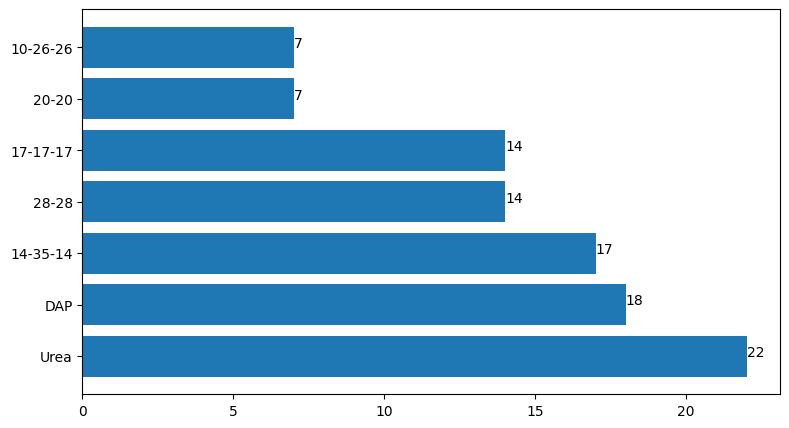

In [17]:

plt.figure(figsize = (9,5))
plt.barh(labels, counts)

for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

<Figure size 2100x1700 with 0 Axes>

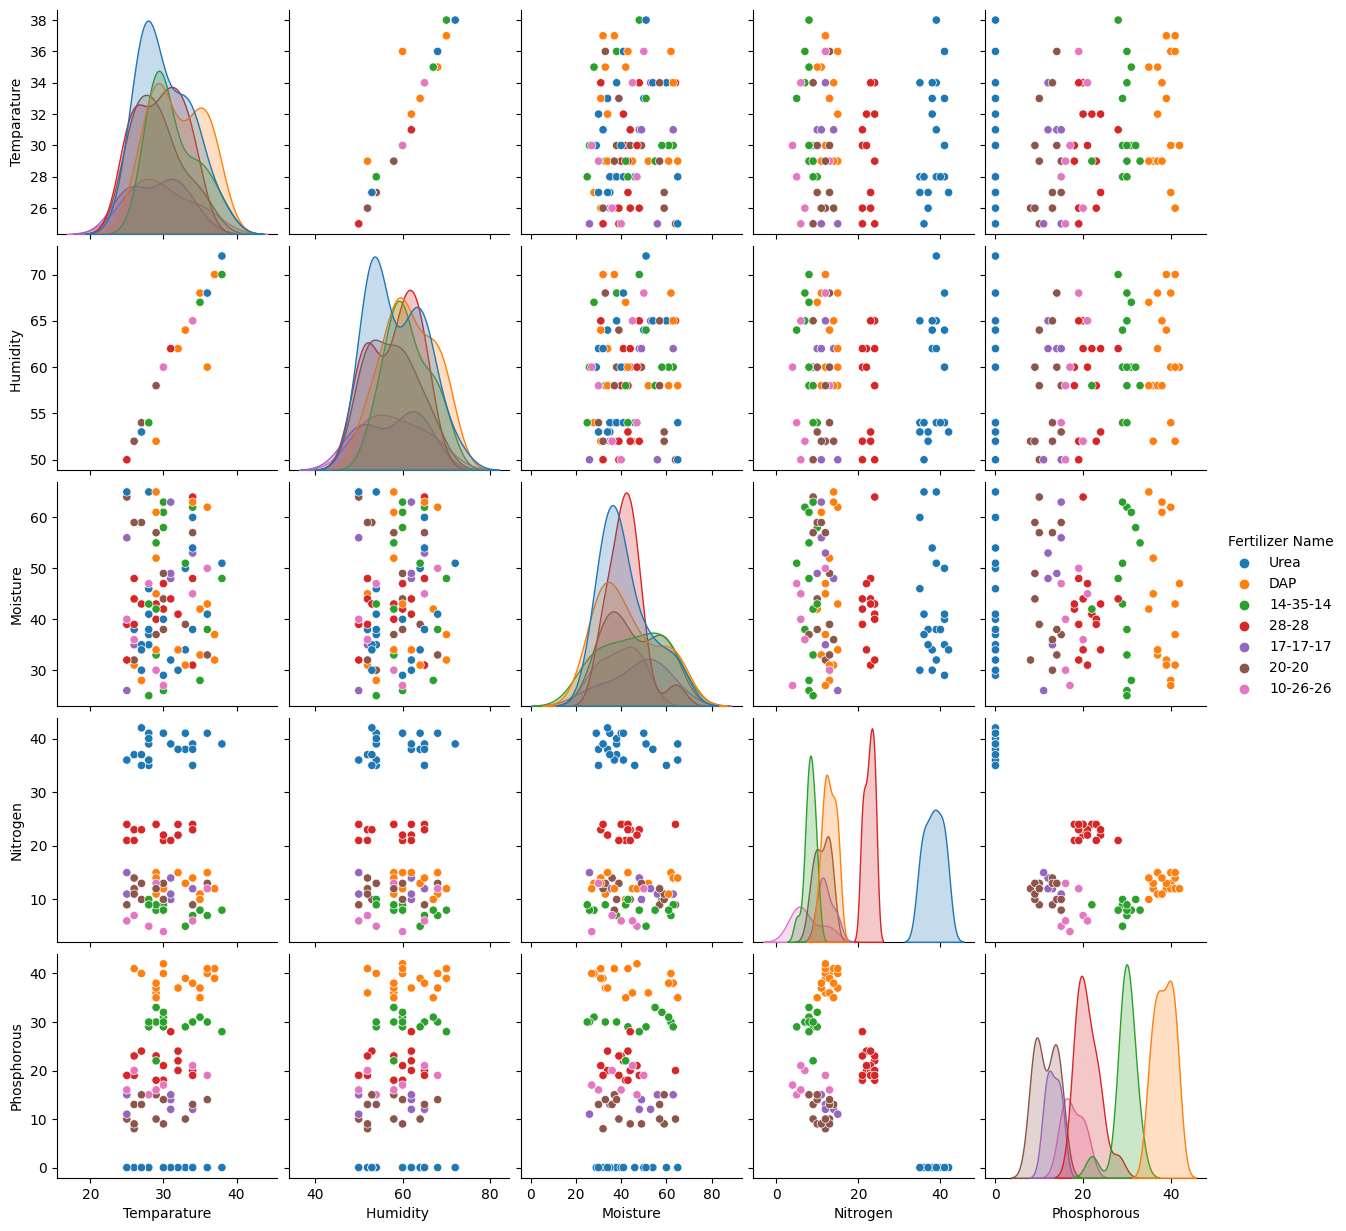

In [18]:
plt.figure(figsize=(21,17))
sns.pairplot(df[continuous_data_cols + ["Fertilizer Name"]], hue = "Fertilizer Name")
plt.show()

In [19]:
continuous_data_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_data_cols = ["Soil Type", "Crop Type"]

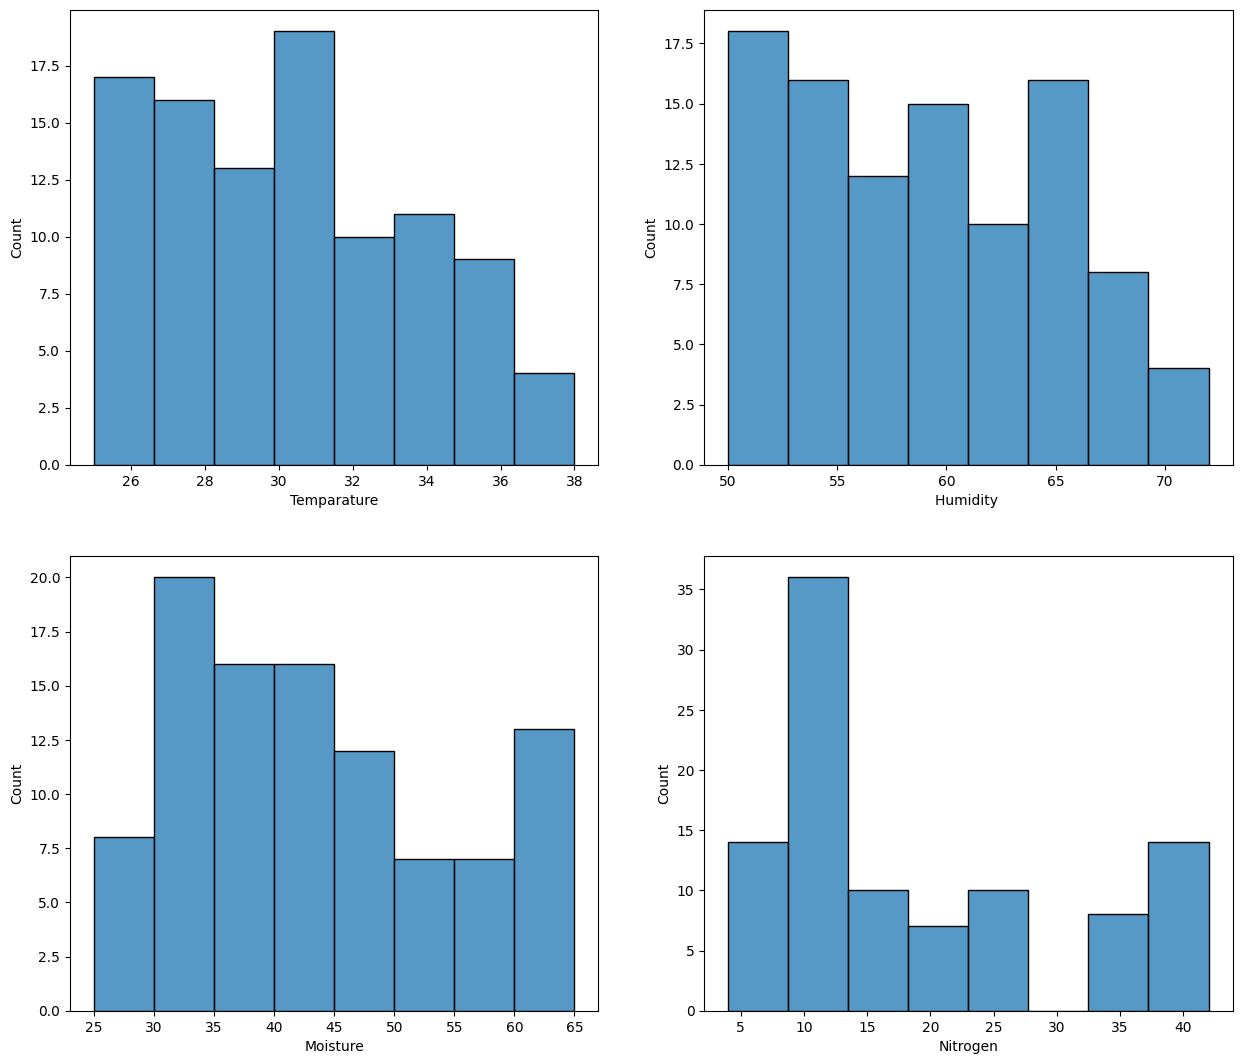

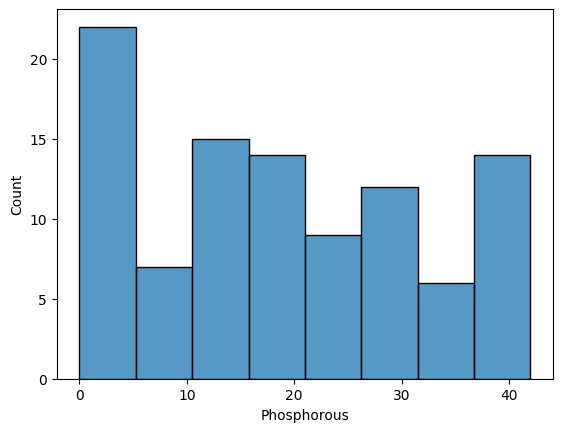

In [20]:
plt.figure(figsize=(15,13))
i = 1
for column in continuous_data_cols[:-1]:
    plt.subplot(2,2,i)
    sns.histplot(df[column])
    i+=1
plt.show()

sns.histplot(df[continuous_data_cols[-1]])
plt.show()


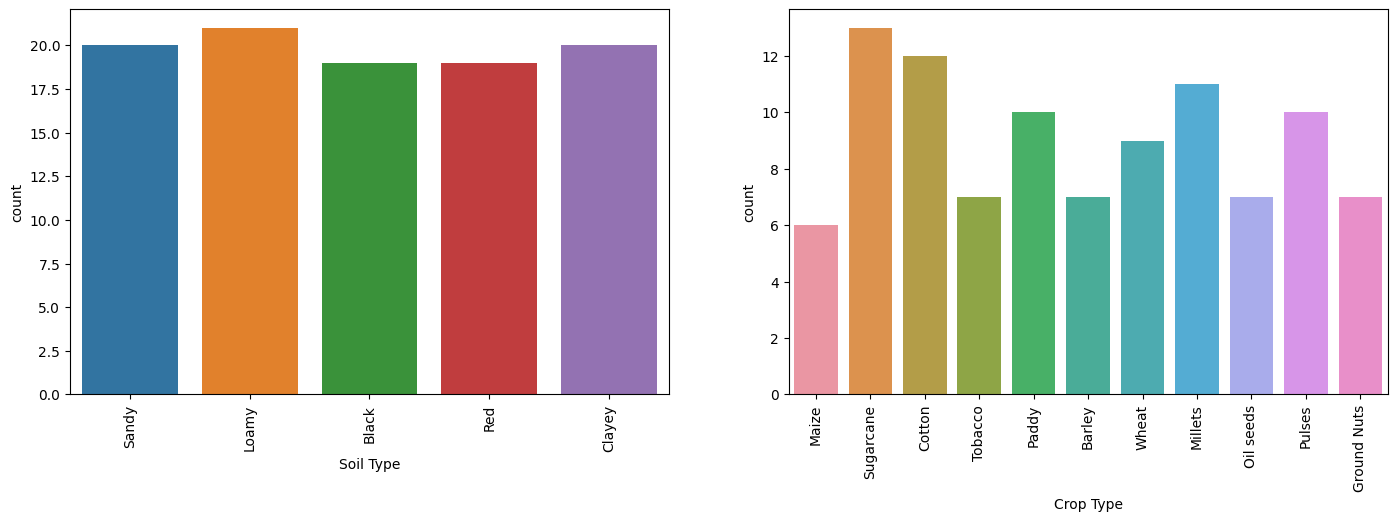

In [21]:

plt.figure(figsize=(17, 5))
i = 1
for column in categorical_data_cols:
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=90)
    i += 1
plt.show()

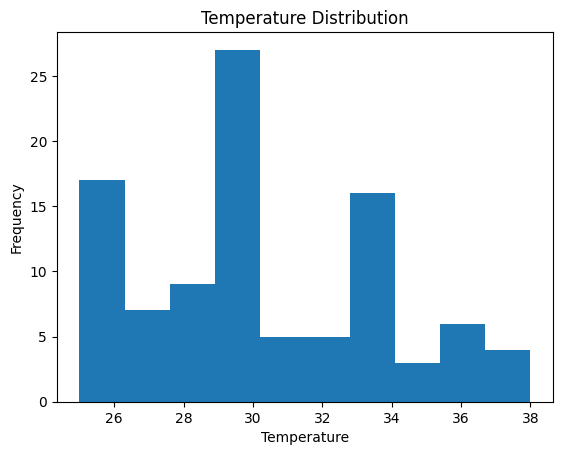

In [22]:
plt.hist(df['Temparature'], bins=10)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

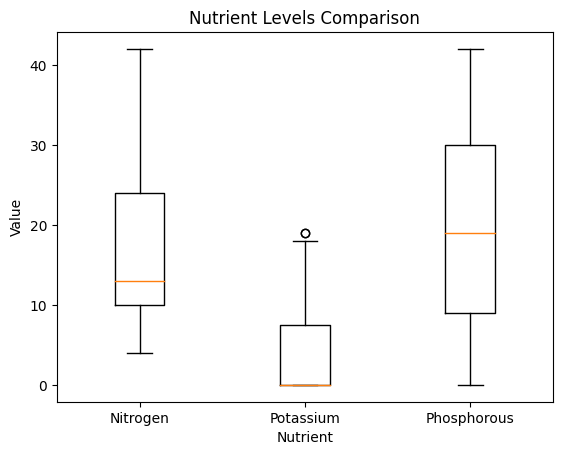

In [23]:
nutrients = ['Nitrogen', 'Potassium', 'Phosphorous']
data = df[nutrients]

plt.boxplot(data)
plt.xlabel('Nutrient')
plt.ylabel('Value')
plt.title('Nutrient Levels Comparison')
plt.xticks(range(1, len(nutrients) + 1), nutrients)
plt.show()

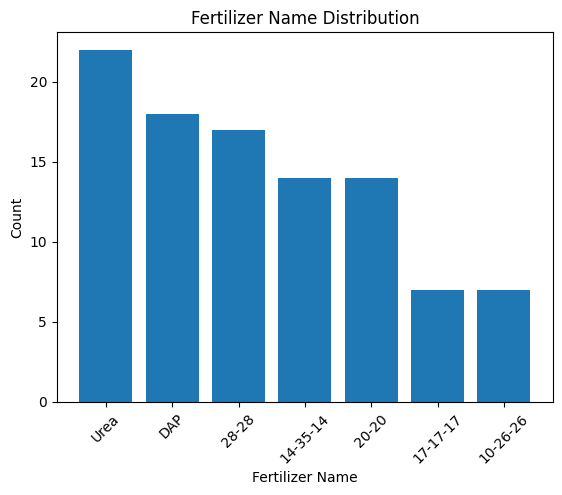

In [24]:
fertilizer_counts = df['Fertilizer Name'].value_counts()

plt.bar(fertilizer_counts.index, fertilizer_counts.values)
plt.xlabel('Fertilizer Name')
plt.ylabel('Count')
plt.title('Fertilizer Name Distribution')
plt.xticks(rotation=45)
plt.show()

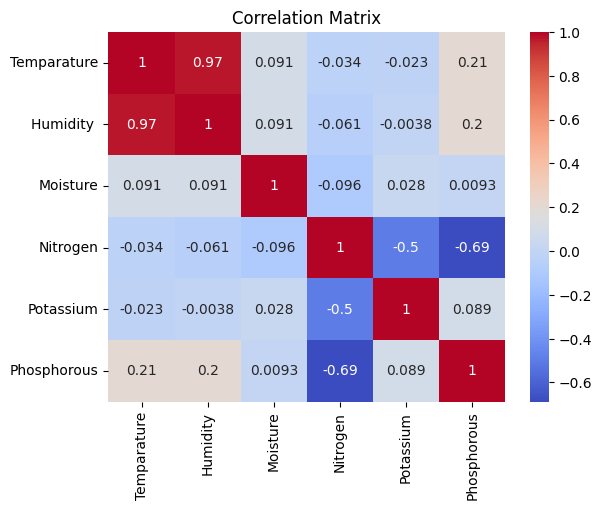

In [25]:
correlation_matrix = df[['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']].corr()

# Remove leading/trailing whitespaces from column names
correlation_matrix.columns = correlation_matrix.columns.str.strip()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


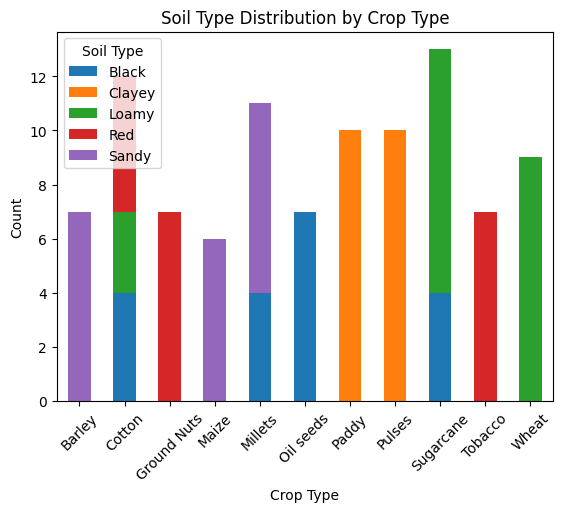

In [26]:
soil_type_counts = df.groupby('Crop Type')['Soil Type'].value_counts().unstack()

soil_type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.title('Soil Type Distribution by Crop Type')
plt.xticks(rotation=45)
plt.legend(title='Soil Type')
plt.show()

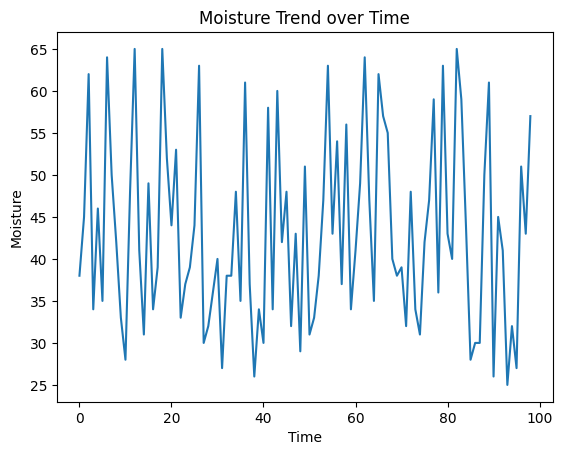

In [27]:
plt.plot(df.index, df['Moisture'])
plt.xlabel('Time')
plt.ylabel('Moisture')
plt.title('Moisture Trend over Time')
plt.show()

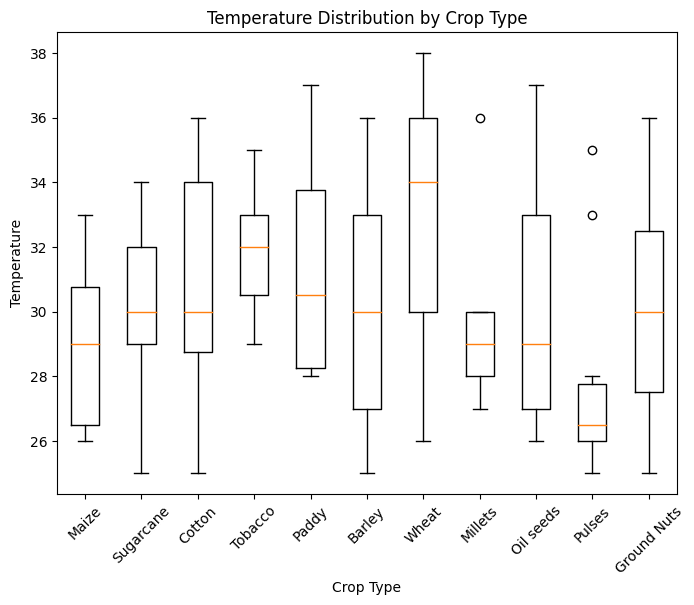

In [28]:
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Crop Type'] == crop]['Temparature'] for crop in df['Crop Type'].unique()], labels=df['Crop Type'].unique())
plt.xlabel('Crop Type')
plt.ylabel('Temperature')
plt.title('Temperature Distribution by Crop Type')
plt.xticks(rotation=45)
plt.show()


### **Model Building**

In [29]:
soil_type_label_encoder = LabelEncoder()
df["Soil Type"] = soil_type_label_encoder.fit_transform(df["Soil Type"])

In [30]:
soilname_dict = {}
for i in range(len(df["Soil Type"].unique())):
    soilname_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soilname_dict)

{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [31]:
crop_type_label_encoder = LabelEncoder()
df["Crop Type"] = crop_type_label_encoder.fit_transform(df["Crop Type"])

In [32]:
cropname_dict = {}
for i in range(len(df["Crop Type"].unique())):
    cropname_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(cropname_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}


In [33]:
fertname_label_encoder = LabelEncoder()
df["Fertilizer Name"] = fertname_label_encoder.fit_transform(df["Fertilizer Name"])

In [34]:
fertname_dict = {}
for i in range(len(df["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [35]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [36]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [37]:
counter = Counter(y)
counter

Counter({6: 22, 5: 18, 1: 14, 4: 17, 2: 7, 3: 14, 0: 7})

In [38]:
upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({6: 22, 5: 22, 1: 22, 4: 22, 2: 22, 3: 22, 0: 22})


## **Splitting the dataset**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (123, 8), (123,)
Train Data: (31, 8), (31,)


In [40]:
acc = []
model = []

#### **SVM_Pipeline**

Accuracy on Test Data: 100.0%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



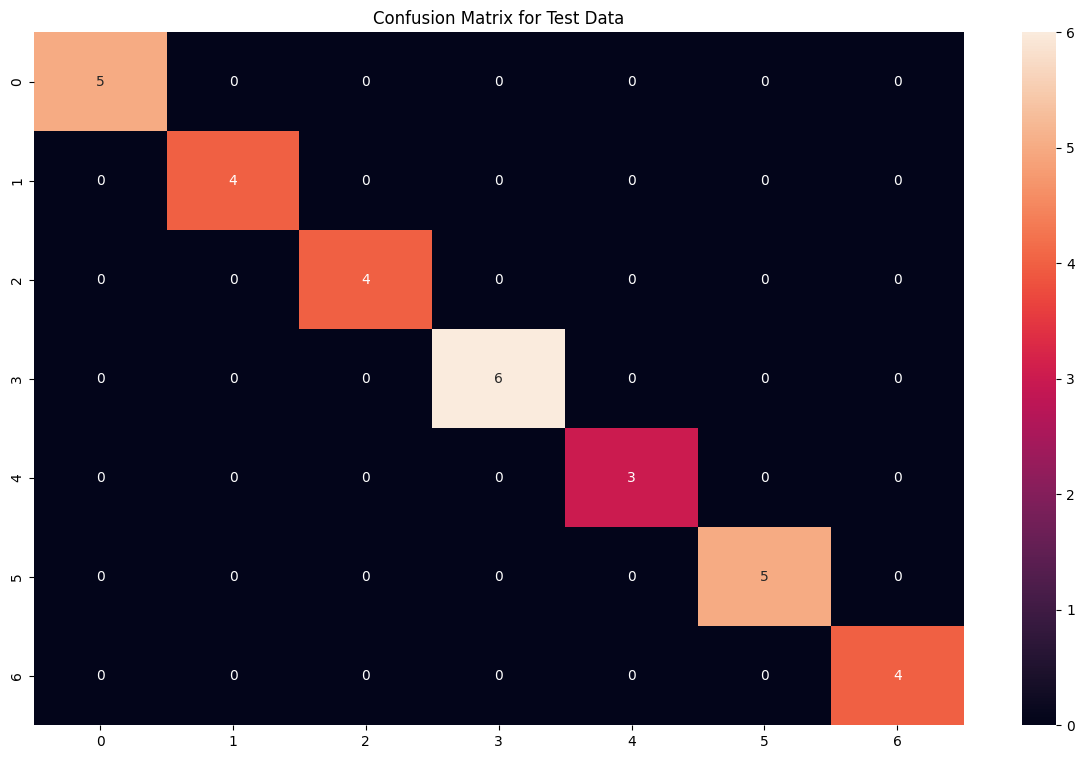


Accuracy on Whole Data: 100.0%


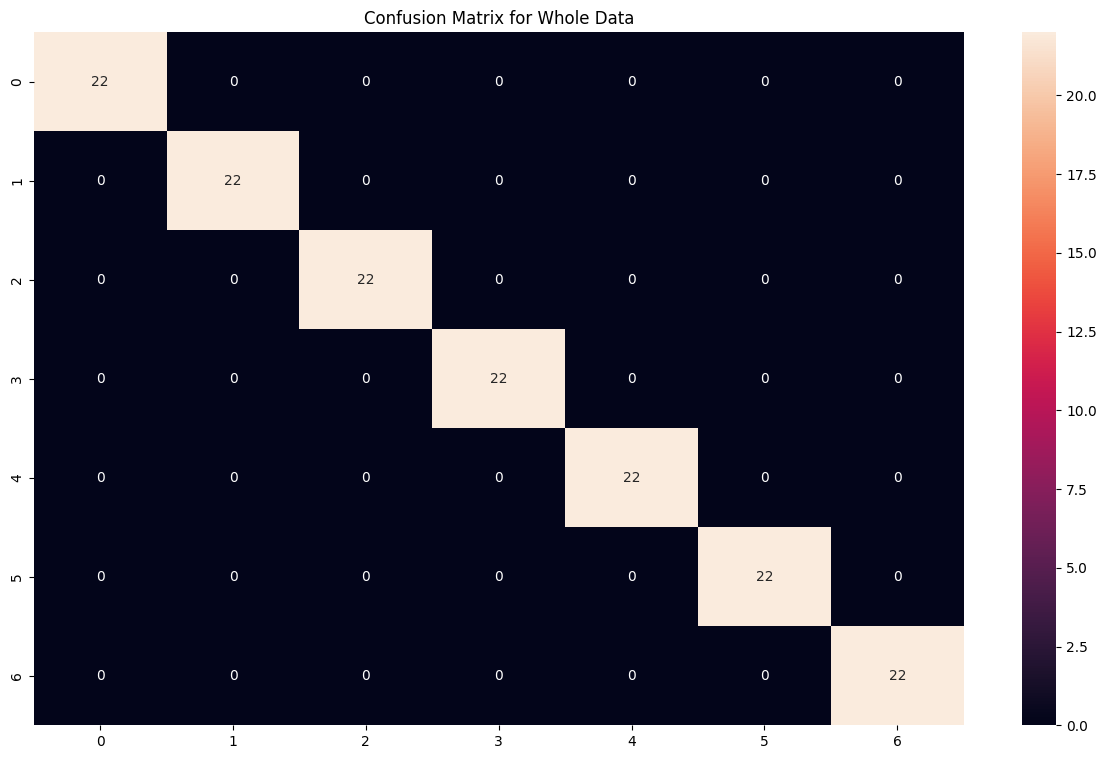

In [41]:
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
acc.append(accuracy)
model.append("SVM_Pipeline")

print("Classification Report:")
print(classification_report(y_test, predictions))


plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = svm_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

#### **RandomForest_Pipeline**

Accuracy on Test Data: 100.0%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



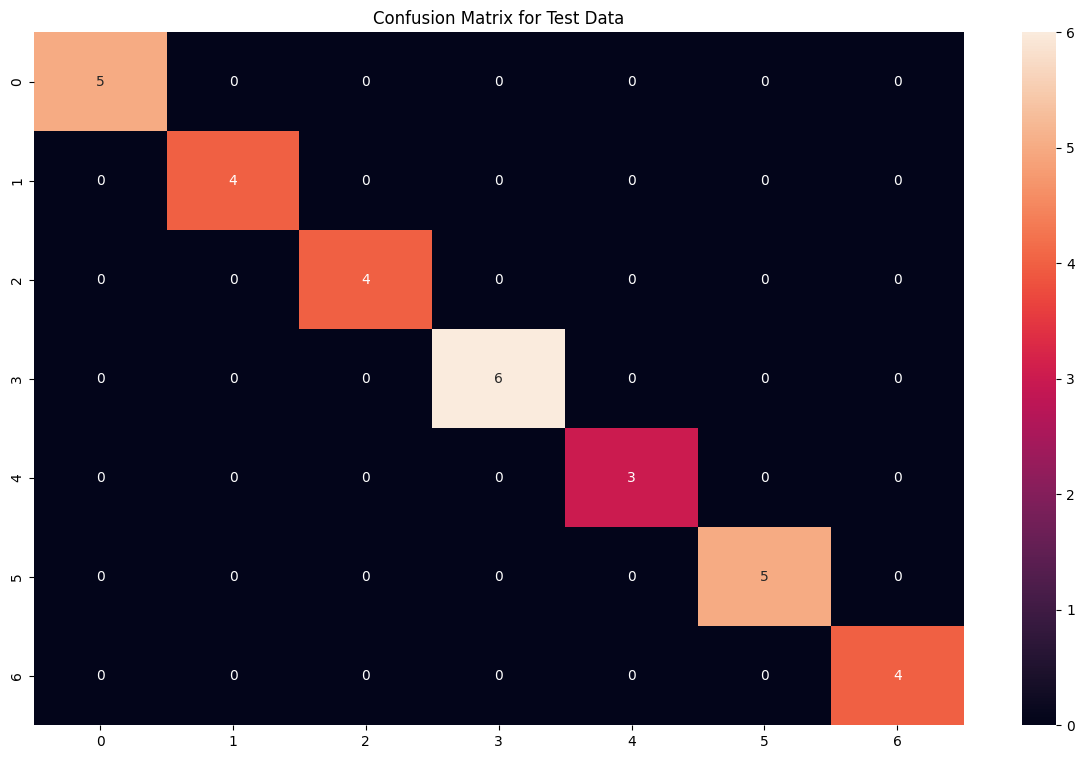


Accuracy on Whole Data: 100.0%


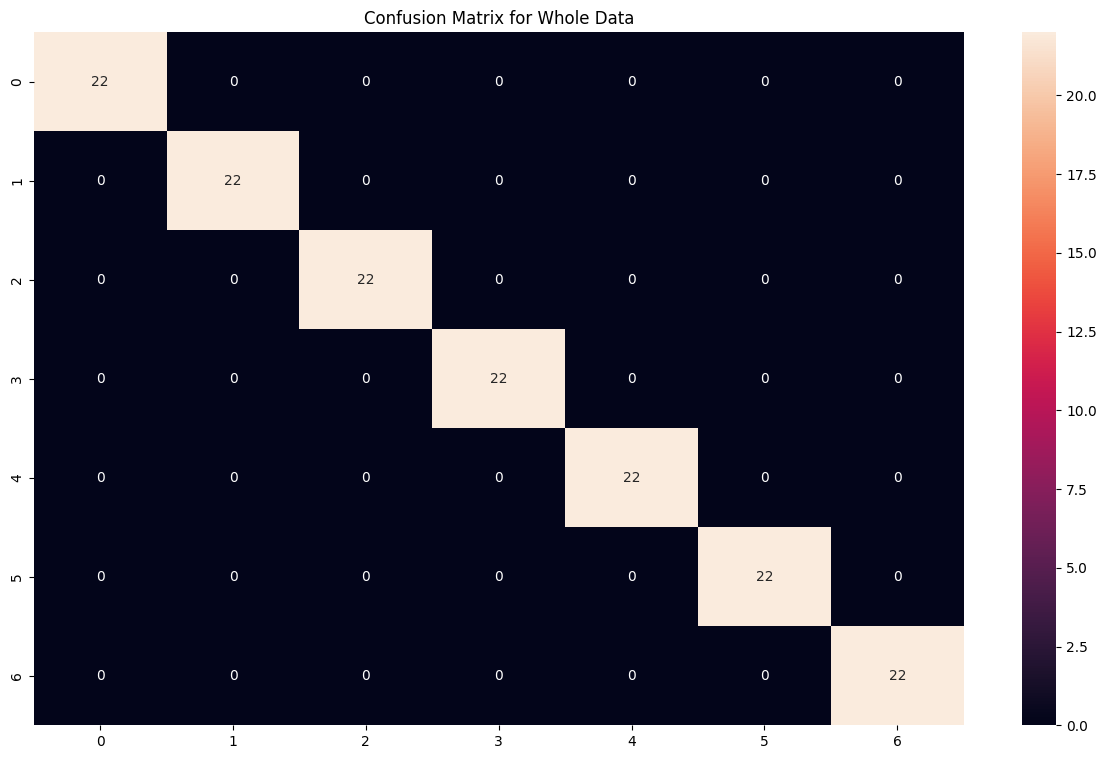

In [42]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
acc.append(accuracy)
model.append("RandomForest Pipeline")

print("Classification Report:")
print(classification_report(y_test, predictions))



plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()




#### **XGBoost_Pipeline**

Accuracy on Test Data: 100.0%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



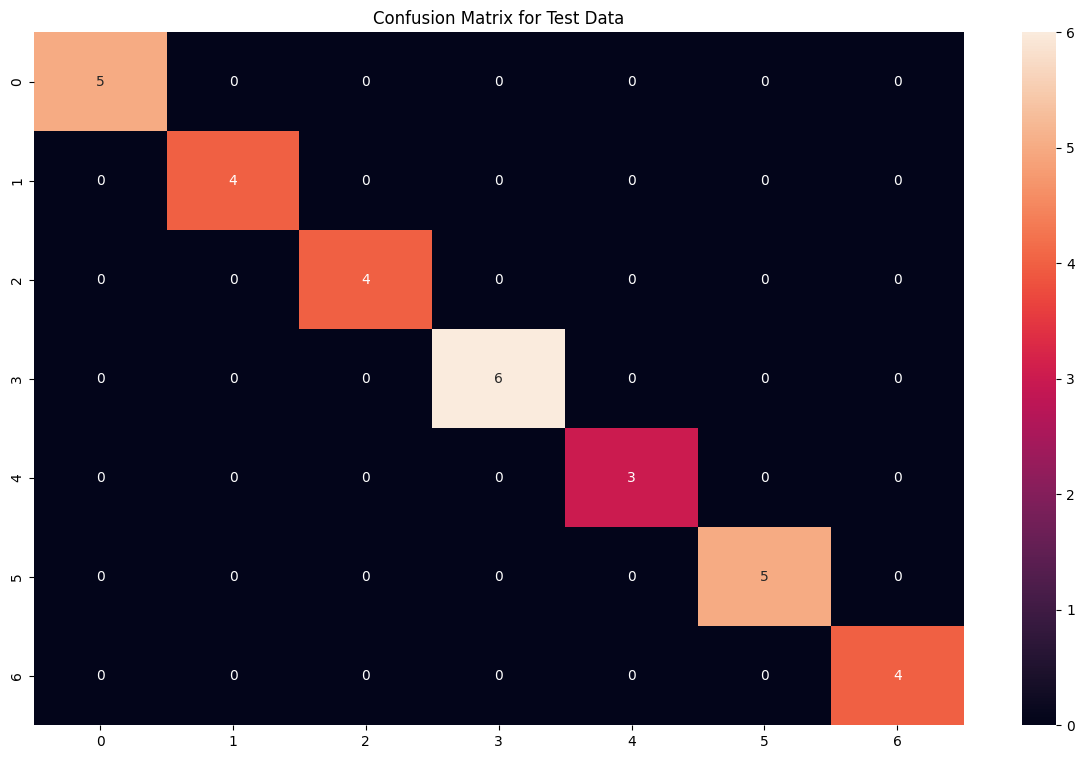

Accuracy on Whole Data: 100.0%


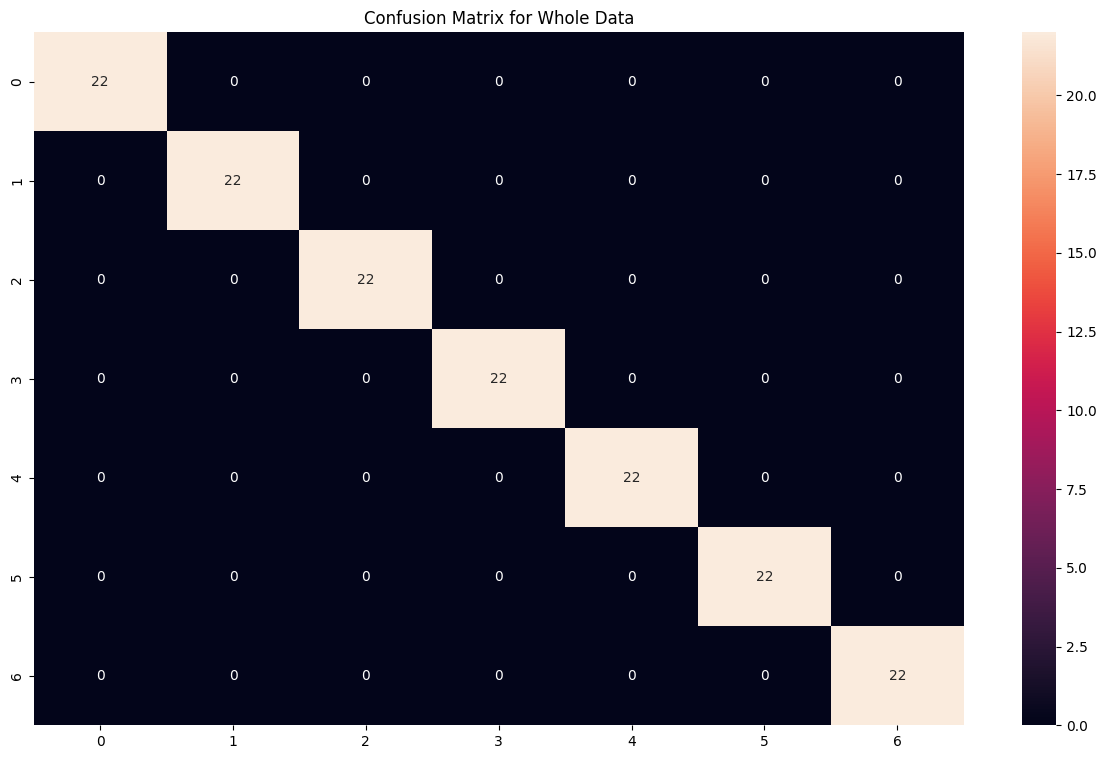

In [43]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

acc.append(accuracy)
model.append("XGBoost Pipeline")

print("Classification Report:")
print(classification_report(y_test, predictions))


plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()



# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

#### **Decision_Tree_Pipeline**

Accuracy on Test Data: 100.0%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



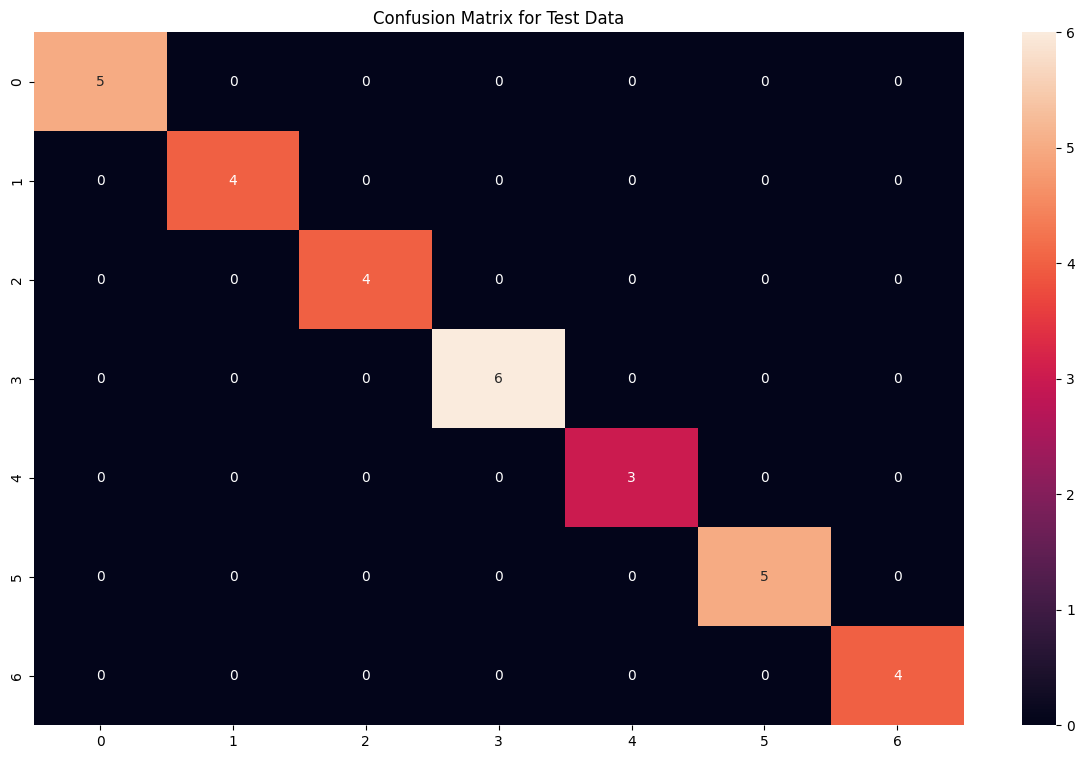

Accuracy on Whole Data: 100.0%


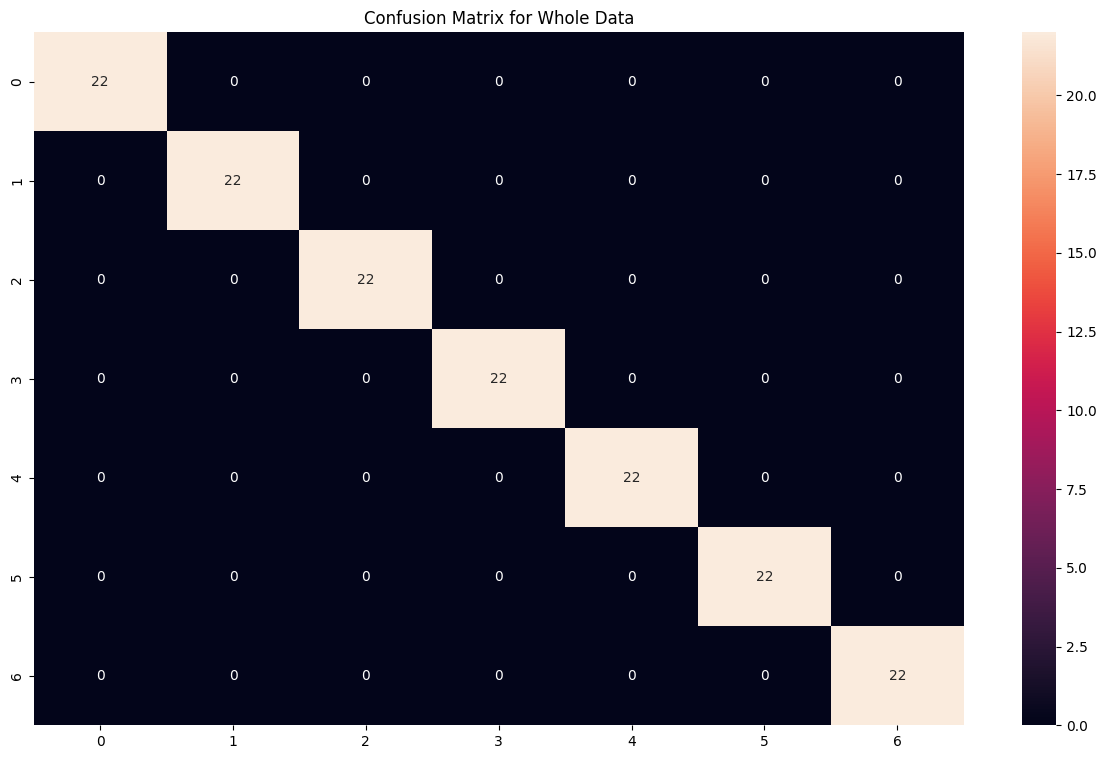

In [44]:
decision_pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=18))
decision_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

acc.append(accuracy)
model.append("DecisionTree_Pipeline")

print("Classification Report:")
print(classification_report(y_test, predictions))


plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()



# Accuray On Whole Data
predictions = decision_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

#### **LogisticRegression_Pipeline**

Accuracy on Test Data: 100.0%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



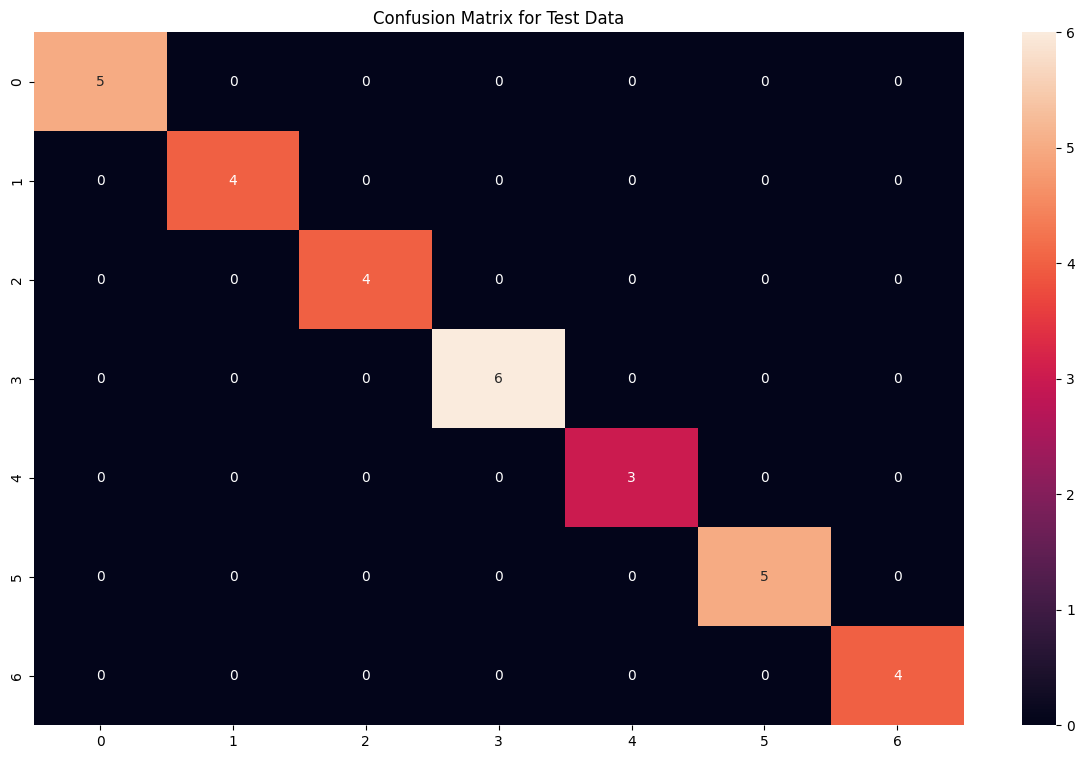

Accuracy on Whole Data: 100.0%


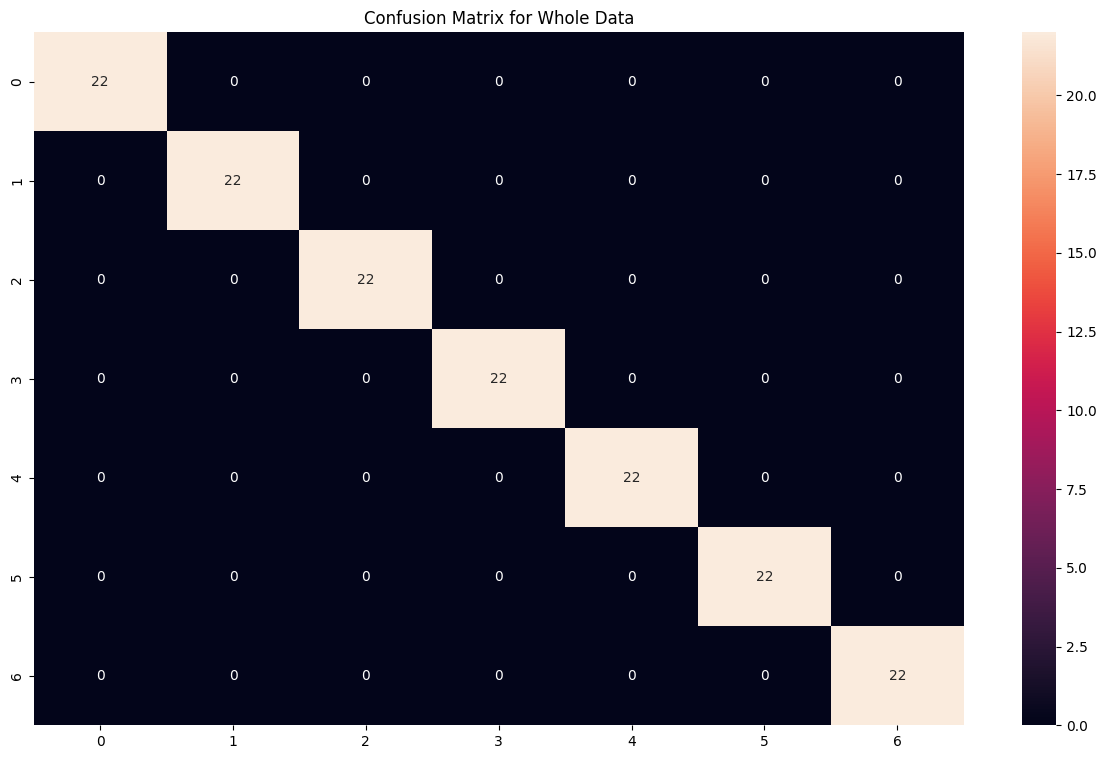

In [45]:
Logisistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=18))
Logisistic_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = Logisistic_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

acc.append(accuracy)
model.append("LogisticRegression_Pipeline")

print("Classification Report:")
print(classification_report(y_test, predictions))


plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()



# Accuray On Whole Data
predictions = Logisistic_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

#### **Comparision of Models**

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

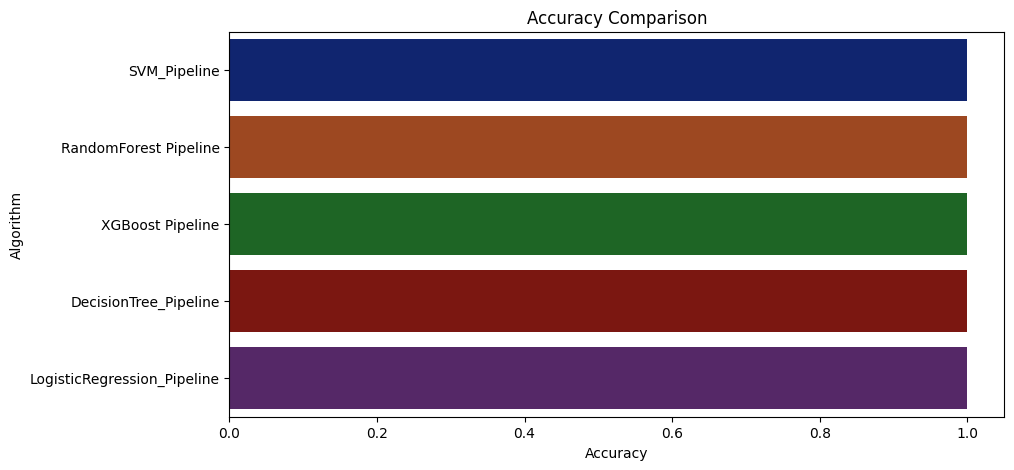

In [46]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')